In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [ ]:
data = pd.merge(transactions, customers, on='CustomerID')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['SignUpYear'] = data['SignupDate'].apply(lambda x: pd.to_datetime(x).year)
customer_summary = data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'SignUpYear': 'first'
}).reset_index()
customer_summary.columns = ['CustomerID', 'NumberOfTransactions', 'TotalSpent', 'TotalQuantity', 'AveragePrice', 'SignUpYear']
print(customer_summary.head())

  CustomerID  NumberOfTransactions  TotalSpent  TotalQuantity  AveragePrice  \
0      C0001                     5     3354.52             12    278.334000   
1      C0002                     4     1862.74             10    208.920000   
2      C0003                     4     2725.38             14    195.707500   
3      C0004                     8     5354.88             23    240.636250   
4      C0005                     3     2034.24              7    291.603333   

   SignUpYear  
0        2022  
1        2022  
2        2024  
3        2022  
4        2022  


In [ ]:
features = customer_summary[['NumberOfTransactions', 'TotalSpent', 'TotalQuantity', 'AveragePrice']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

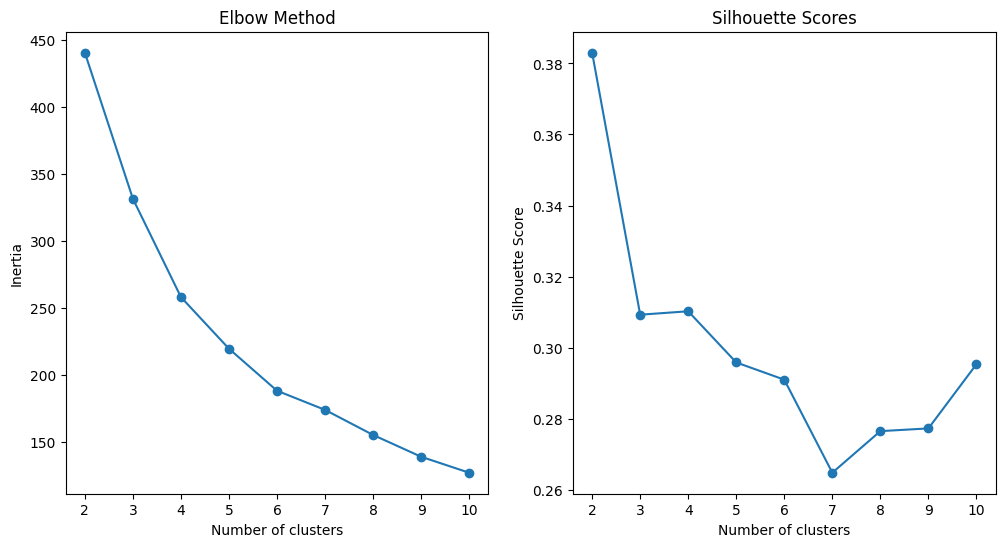

In [ ]:
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(features_scaled)
print(customer_summary.head())

  CustomerID  NumberOfTransactions  TotalSpent  TotalQuantity  AveragePrice  \
0      C0001                     5     3354.52             12    278.334000   
1      C0002                     4     1862.74             10    208.920000   
2      C0003                     4     2725.38             14    195.707500   
3      C0004                     8     5354.88             23    240.636250   
4      C0005                     3     2034.24              7    291.603333   

   SignUpYear  Cluster      PCA1      PCA2  
0        2022        3 -0.099650  0.104856  
1        2022        2 -1.151040 -0.821010  
2        2024        2 -0.527719 -1.046066  
3        2022        0  2.261159 -0.852742  
4        2022        1 -1.472474  0.507406  


In [ ]:
db_index = davies_bouldin_score(features_scaled, customer_summary['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9665052371785321


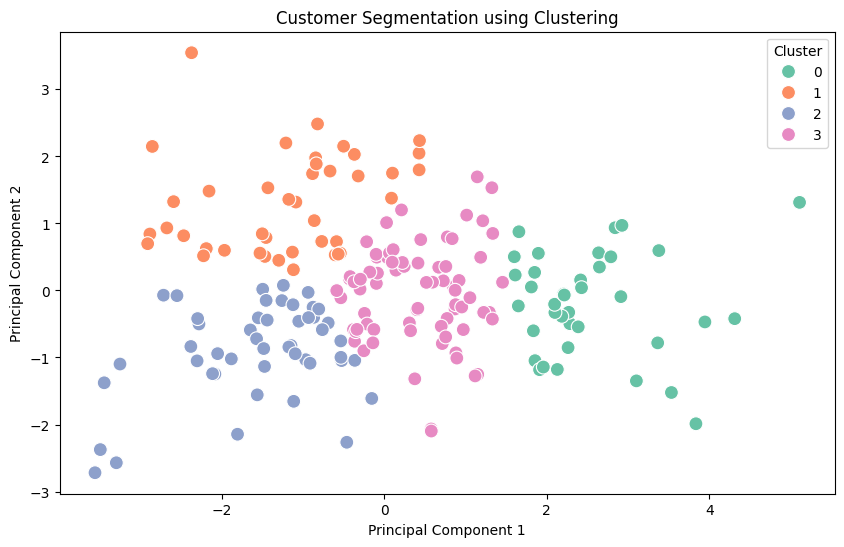

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

customer_summary['PCA1'] = principal_components[:, 0]
customer_summary['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_summary, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segmentation using Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [ ]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [ ]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

In [ ]:
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    num_unique_products=('ProductID', 'nunique')
).reset_index()

In [ ]:
scaler = StandardScaler()
customer_summary_scaled_df = customer_summary[['total_spent', 'num_transactions', 'avg_transaction_value', 'num_unique_products']]
customer_summary_scaled_df = scaler.fit_transform(customer_summary_scaled_df)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_summary_scaled_df = pd.DataFrame(customer_summary_scaled_df, columns=['total_spent', 'num_transactions', 'avg_transaction_value', 'num_unique_products'])
customer_summary_scaled_df['Cluster'] = kmeans.fit_predict(customer_summary_scaled_df)

In [ ]:
customer_summary['Cluster'] = customer_summary_scaled_df['Cluster']

In [ ]:
db_index = davies_bouldin_score(customer_summary_scaled_df[['total_spent', 'num_transactions', 'avg_transaction_value', 'num_unique_products']], customer_summary['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8990150327879454


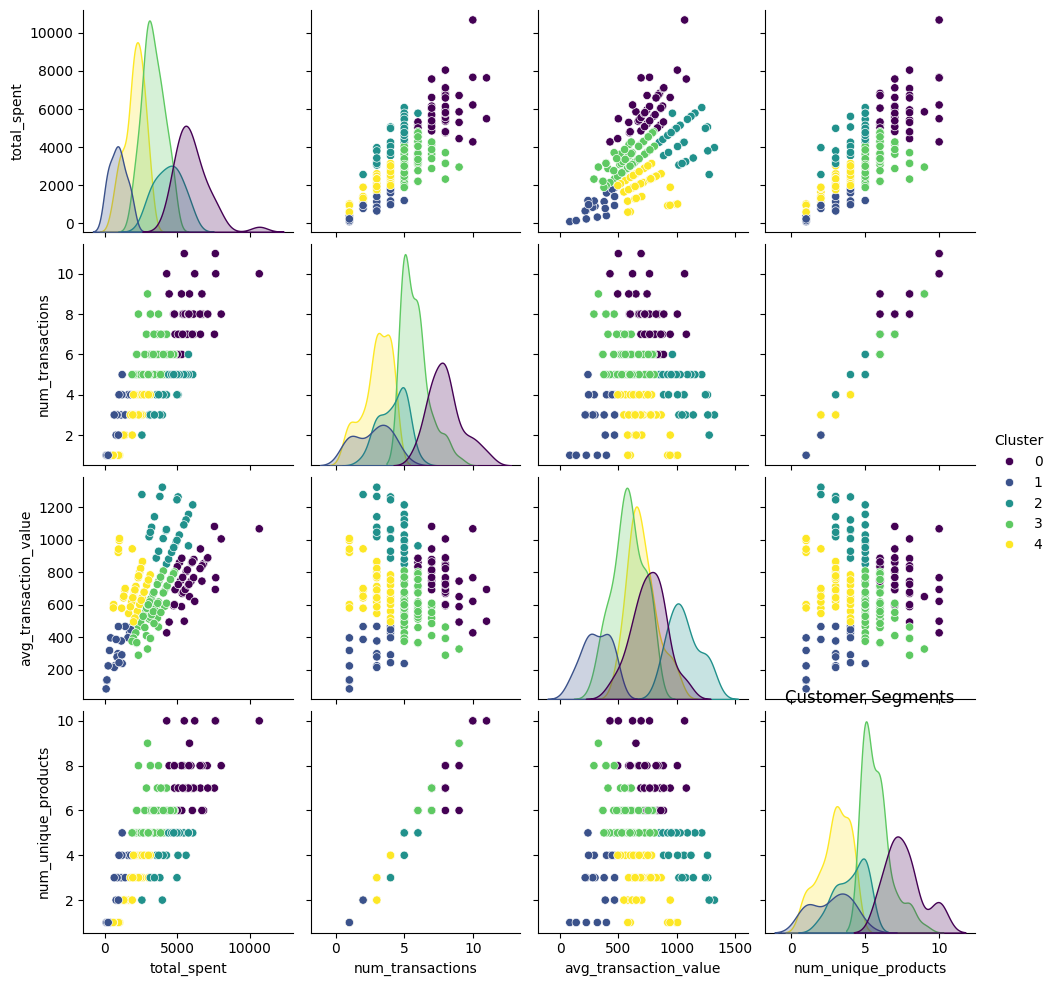

In [ ]:
sns.pairplot(customer_summary[['total_spent', 'num_transactions', 'avg_transaction_value', 'num_unique_products', 'Cluster']], hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

In [ ]:
customer_summary[['CustomerID', 'Cluster']].to_csv('Jaswanth_Chowdary_Myneni.csv', index=False)
print(customer_summary.head())

  CustomerID  total_spent  num_transactions  avg_transaction_value  \
0      C0001      3354.52                 5                670.904   
1      C0002      1862.74                 4                465.685   
2      C0003      2725.38                 4                681.345   
3      C0004      5354.88                 8                669.360   
4      C0005      2034.24                 3                678.080   

   num_unique_products  Cluster  
0                    5        3  
1                    4        1  
2                    4        4  
3                    8        0  
4                    3        4  
